## Multi Logistic Regression From Scratch

### Import

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
from mlxtend.plotting import plot_decision_regions

### Data

In [2]:
x , y = load_iris(return_X_y=True)

In [3]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=8)

x_train.shape , x_test.shape , y_train.shape , y_test.shape


((120, 4), (30, 4), (120,), (30,))

### Functions

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def multi_logistic_reg(w , x):
    y_hat = sigmoid(x@w)
    return y_hat

def bce(y , y_hat):
    loss = -np.mean(np.sum(y*np.log(y_hat) + (1 - y) * np.log(1-y_hat) , 1))
    return loss

def gradient(x , y , y_hat):
    grads = (x.T @ (y_hat - y)) / len(y)
    return grads
    
def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w

def accuracy(y, y_hat):
    acc = np.sum(y == np.argmax(y_hat, 1)) / len(y)
    return acc

### Train Model

In [5]:
x_train = np.hstack((np.ones((x_train.shape[0] , 1)) , x_train))
x_test = np.hstack((np.ones((len(x_test), 1)), x_test))
y_train= label_binarize(y_train, classes=np.unique(y_train))
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

x_test.shape, y_test.shape , y_test


((30, 5),
 (30,),
 array([0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0,
        1, 1, 1, 0, 2, 0, 0, 2]))

In [6]:
n, m = x_train.shape
c = len(np.unique(y))

w = np.random.randn(m, c)


In [7]:
import joblib

loss_train_hist, loss_test_hist = [], []
best_loss = np.inf
n_es = 0
n_epochs = 2000
eta = 0.02

for epoch in range(n_epochs):
    # predictions
    y_hat_train = multi_logistic_reg(w, x_train)
    y_hat_test = multi_logistic_reg(w, x_test)
    
    # loss
    loss_train = bce(y_train , y_hat_train)
    loss_train_hist.append(loss_train)
    
    loss_test = bce(y_test_binarized , y_hat_test)
    loss_test_hist.append(loss_test)

    # gradients
    grads = gradient(x_train , y_train , y_hat_train)

    # gradient descent
    w = gradient_descent(w , eta , grads)

    # early stopping
    if loss_test < best_loss:
        best_loss = loss_test
        joblib.dump(w, 'best-model.joblib')
        best_epoch = epoch
        n_es = 0
    else:
        n_es += 1
        if n_es >= 5:
            break
        
    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t Loss_train={loss_train:.4},\t Loss_test={loss_test:.4}, \t w={w.T[0]}')

print(f'Best epoch:{best_epoch}, Best loss:{best_loss}')

Epoch=99, 	 Loss_train=1.153,	 Loss_test=1.133, 	 w=[-0.89802679  0.53353078  0.28538444 -0.70357767 -1.53687884]
Epoch=199, 	 Loss_train=1.076,	 Loss_test=1.058, 	 w=[-0.8719306   0.57768493  0.43493444 -0.9196026  -1.62928123]
Epoch=299, 	 Loss_train=1.025,	 Loss_test=1.009, 	 w=[-0.8531509   0.60858037  0.54401681 -1.07824255 -1.69702603]
Epoch=399, 	 Loss_train=0.9855,	 Loss_test=0.9724, 	 w=[-0.83849278  0.63228504  0.62988826 -1.20361195 -1.75055188]
Epoch=499, 	 Loss_train=0.9539,	 Loss_test=0.9436, 	 w=[-0.82647132  0.65150114  0.70073238 -1.30731324 -1.79484614]
Epoch=599, 	 Loss_train=0.9273,	 Loss_test=0.9197, 	 w=[-0.8162796   0.66765595  0.76105714 -1.39578931 -1.83266617]
Epoch=699, 	 Loss_train=0.9043,	 Loss_test=0.8993, 	 w=[-0.80743139  0.68159206  0.8136064  -1.4729819  -1.8656938 ]
Epoch=799, 	 Loss_train=0.884,	 Loss_test=0.8816, 	 w=[-0.79961134  0.69384742  0.86017345 -1.54147635 -1.8950298 ]
Epoch=899, 	 Loss_train=0.866,	 Loss_test=0.866, 	 w=[-0.79260347  0.704

### Visualize

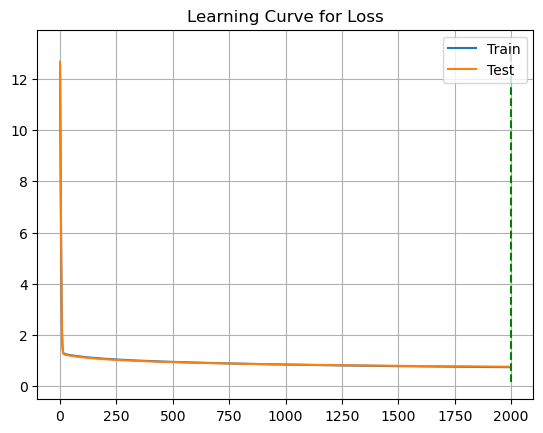

In [8]:
plt.plot(loss_train_hist, label='Train')
plt.plot(loss_test_hist, label='Test')

ymin, ymax = plt.ylim()
plt.vlines(best_epoch, ymin, ymax, color='g', linestyles='--')
plt.title('Learning Curve for Loss');
plt.legend()
plt.grid()

### Test Model 

In [9]:
y_hat_test = multi_logistic_reg(w , x_test)
y_hat_test , y_test

(array([[9.85260407e-01, 1.34512344e-01, 5.73867584e-05],
        [9.56003841e-01, 1.85920200e-01, 2.53747501e-04],
        [9.82606769e-01, 1.53963029e-01, 6.46369998e-05],
        [9.93041731e-04, 3.63273022e-01, 5.50142294e-01],
        [2.32482934e-02, 3.59971967e-01, 7.39188884e-02],
        [9.65087633e-01, 2.02589545e-01, 1.80928950e-04],
        [9.35432974e-01, 1.75991343e-01, 2.54446182e-04],
        [6.14181872e-04, 3.83595481e-01, 7.01421623e-01],
        [2.08379323e-04, 4.47856526e-01, 9.11209435e-01],
        [2.19468536e-02, 3.92077183e-01, 1.00038247e-01],
        [7.79618730e-03, 3.08418015e-01, 2.12054167e-01],
        [9.54206734e-01, 2.03866794e-01, 2.59857252e-04],
        [1.22539806e-03, 4.12040049e-01, 8.19322557e-01],
        [1.80409928e-02, 3.67684831e-01, 8.31948463e-02],
        [1.10832904e-03, 5.74992131e-01, 7.93890343e-01],
        [8.63314139e-04, 4.94049830e-01, 7.49632876e-01],
        [8.52491504e-04, 3.92697157e-01, 7.32584109e-01],
        [2.037

In [10]:
print(f"accuracy: {accuracy(y_test, y_hat_test) * 100:.2f}%")

accuracy: 96.67%
